# Analyze Traffic Safety Data with Python

### Resources

* https://www.dot.state.oh.us/Divisions/Planning/LocalPrograms/LTAP/Documents/OH-1_FINAL.PDF
* 
*

In [53]:
import pandas as pd
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
# set plot theme and palette
sns.set_theme()
sns.set_palette('colorblind')

## Traffic data exploration

### 1. Inspect the traffic safety dataset



In [ ]:
# load dataset
traffic = pd.read_csv('traffic.csv')
# inspect first few rows
print(traffic)

## Distracted Driver Rates

In [ ]:
# Count the number of distracted and non-distracted drivers
distracted_counts = traffic['DISTRACTED_DRIVER_IND'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
distracted_counts.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel("Distracted Driving")
plt.ylabel("Number of Accidents")
plt.title("Number of Distracted vs. Non-Distracted Drivers")
plt.xticks(ticks=[0,1], labels=['Not Distracted', 'Distracted'], rotation=0)

# Show the chart
plt.show()

In [ ]:

# Define severity and weather mappings
severity_mapping = {
    1: "Minor",
    2: "Moderate",
    3: "Serious",
    4: "Severe",
    5: "Fatal"
}



# Convert to numeric if necessary
traffic['CRASH_SEVERITY_CD'] = pd.to_numeric(traffic['CRASH_SEVERITY_CD'], errors='coerce')

# Apply mappings
traffic['CRASH_SEVERITY'] = traffic['CRASH_SEVERITY_CD'].map(severity_mapping)

# Drop missing values after mapping
traffic = traffic.dropna(subset=['CRASH_SEVERITY'])


severity_by_distracted = traffic.groupby(['DISTRACTED_DRIVER_IND', 'CRASH_SEVERITY']).size().unstack()

# Plot
severity_by_distracted.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Crash Severity by Distracted vs. Non-Distracted Drivers")
plt.xlabel("Distracted Driving")
plt.ylabel("Number of Accidents")
plt.legend(title="Crash Severity")
plt.xticks(ticks=[0,1], labels=['Not Distracted', 'Distracted'], rotation=0)
plt.show()


In [ ]:
traffic['CRASH_MONTH_YEAR'] = pd.to_datetime(traffic['CRASH_MONTH_YEAR'])
traffic['SEASON'] = traffic['CRASH_MONTH_YEAR'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

season_distracted = traffic.groupby(['SEASON', 'DISTRACTED_DRIVER_IND']).size().unstack()

# Plot
season_distracted.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Seasonal Trends of Distracted Driving Accidents")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.legend(title="Distracted Driving")
plt.show()


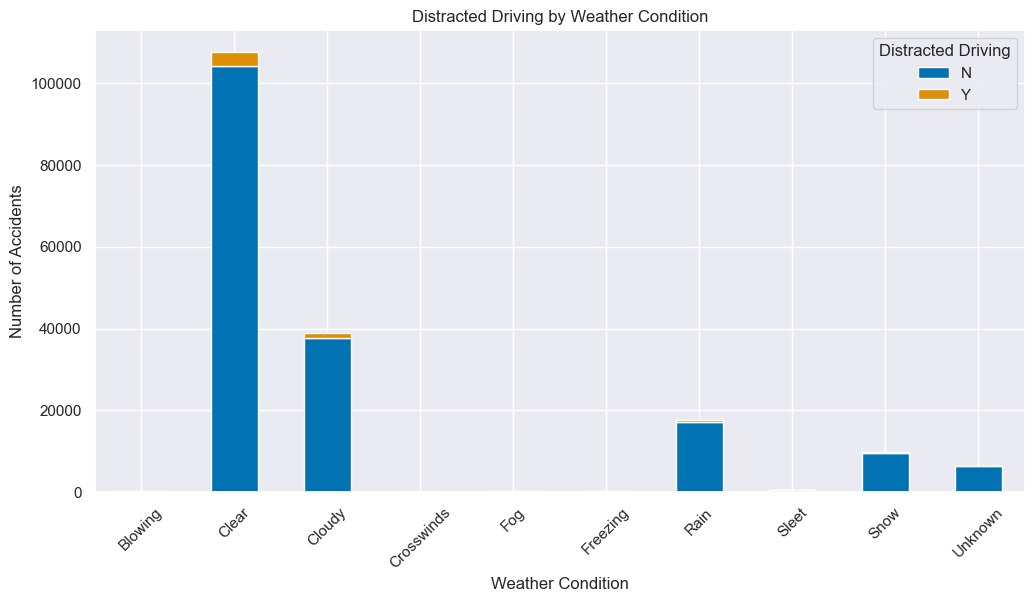

In [62]:
weather_mapping = {

1: "Clear",
2: "Cloudy",
3: "Fog",
4: "Rain",
5: "Sleet",
6: "Snow",
7: "Crosswinds",
8: "Blowing",
9: "Freezing",
99: "Unknown"


}

# Convert to numeric if necessary
traffic['WEATHER_COND_CD'] = pd.to_numeric(traffic['WEATHER_COND_CD'], errors='coerce')

# Apply mappings
traffic['WEATHER_CONDITION'] = traffic['WEATHER_COND_CD'].map(weather_mapping)

# Drop missing values after mapping
traffic = traffic.dropna(subset=['CRASH_SEVERITY'])

distracted_weather = traffic.groupby(['WEATHER_CONDITION', 'DISTRACTED_DRIVER_IND']).size().unstack()

# Plot
distracted_weather.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Distracted Driving by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Distracted Driving")
plt.xticks(rotation=45)
plt.show()


### Crash Rates by Weather Conditions

In [ ]:

# Define severity and weather mappings
severity_mapping = {
    1: "Minor",
    2: "Moderate",
    3: "Serious",
    4: "Severe",
    5: "Fatal"
}

weather_mapping = {
    1: "Clear",
    2: "Cloudy",
    3: "Rain",
    4: "Snow",
    5: "Fog/Smoke",
    6: "Sleet/Hail",
    7: "Severe Crosswinds",
    8: "Blowing Sand/Dust",
    9: "Other",
    99: "Unknown"
}

# Convert to numeric if necessary
traffic['WEATHER_COND_CD'] = pd.to_numeric(traffic['WEATHER_COND_CD'], errors='coerce')
traffic['CRASH_SEVERITY_CD'] = pd.to_numeric(traffic['CRASH_SEVERITY_CD'], errors='coerce')

# Apply mappings
traffic['WEATHER_CONDITION'] = traffic['WEATHER_COND_CD'].map(weather_mapping)
traffic['CRASH_SEVERITY'] = traffic['CRASH_SEVERITY_CD'].map(severity_mapping)

# Drop missing values after mapping
traffic = traffic.dropna(subset=['WEATHER_CONDITION', 'CRASH_SEVERITY'])

# Group by Weather Condition and Severity
severity_by_weather = traffic.groupby(['WEATHER_CONDITION', 'CRASH_SEVERITY']).size().unstack(fill_value=0)

# Debugging: Check if data exists
print(severity_by_weather)

# Plot the results
severity_by_weather.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Accident Severity by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Crash Severity")
plt.xticks(rotation=45)
plt.show()
